<a href="https://colab.research.google.com/github/ritik105/Zomato_Analysis/blob/main/Zomato_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Zomato Data Analysis
#### Zomato is an Indian multinational restaurant aggregator and food delivery company founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants as well as food delivery options from partner restaurants in select cities.
#### This data contain all India Zomato store data which includes 
   * Names of Store
   - Address of Store
   - Locality 
   - City
   - Rating of store
   - Review

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Import Liberaries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns

In [7]:
df =pd.read_csv("/content/drive/MyDrive/Colab Notebooks/zomato_restaurants_in_India.csv") # import zomato csv file for visualization

In [39]:
df.head() 
#head() is used to show top 5 rows from the dataset . If you want to see n number of rows then use head(n) instead of head().

,res_id,name,establishment,address,city,locality,latitude,longitude,locality_verbose,cuisines,...,average_cost_for_two,price_range,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,Khandari,27.211450,78.002381,"Khandari, Agra","North Indian, South Indian, Mithai, Street Foo...",...,700,2,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,Agra Cantt,27.160569,78.011583,"Agra Cantt, Agra","North Indian, Mughlai, Rolls, Chinese, Fast Fo...",...,600,2,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,Shahganj,27.182938,77.979684,"Shahganj, Agra","Fast Food, Mithai",...,300,1,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,Civil Lines,27.205668,78.004799,"Civil Lines, Agra","Desserts, Bakery, Fast Food, South Indian",...,300,1,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,Tajganj,27.157709,78.052421,"Tajganj, Agra","North Indian, Continental, Italian",...,1000,3,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1


In [9]:
df.tail()
#tail() is used to show top last 5 rows from the dataset . If you want to see n number of rows from last then use tail(n) instead of tail().

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
211939,3202251,Kali Mirch Cafe And Restaurant,['Casual Dining'],https://www.zomato.com/vadodara/kali-mirch-caf...,"Manu Smriti Complex, Near Navrachna School, GI...",Vadodara,32,Fatehgunj,22.336931,73.192356,...,2,Rs.,"['Dinner', 'Cash', 'Lunch', 'Delivery', 'Indoo...",4.1,Very Good,243,40,0.0,-1,-1
211940,3200996,Raju Omlet,['Quick Bites'],https://www.zomato.com/vadodara/raju-omlet-kar...,"Mahalaxmi Apartment, Opposite B O B, Karoli Ba...",Vadodara,32,Karelibaug,22.322455,73.197203,...,1,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.1,Very Good,187,40,0.0,1,-1
211941,18984164,The Grand Thakar,['Casual Dining'],https://www.zomato.com/vadodara/the-grand-thak...,"3rd Floor, Shreem Shalini Mall, Opposite Conqu...",Vadodara,32,Alkapuri,22.310563,73.171163,...,2,Rs.,"['Dinner', 'Cash', 'Debit Card', 'Lunch', 'Tak...",4.0,Very Good,111,38,0.0,-1,-1
211942,3201138,Subway,['Quick Bites'],https://www.zomato.com/vadodara/subway-1-akota...,"G-2, Vedant Platina, Near Cosmos, Akota, Vadodara",Vadodara,32,Akota,22.270027,73.143068,...,2,Rs.,"['Dinner', 'Delivery', 'Credit Card', 'Lunch',...",3.7,Good,128,34,0.0,1,-1
211943,18879846,Freshco's - The Health Cafe,['Café'],https://www.zomato.com/vadodara/freshcos-the-h...,"Shop 7, Ground Floor, Opposite Natubhai Circle...",Vadodara,32,Vadiwadi,22.309935,73.158768,...,2,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.0,Very Good,93,53,0.0,1,-1


In [10]:
list(df.columns)
# here list is used to display coloumns name 

['res_id',
 'name',
 'establishment',
 'url',
 'address',
 'city',
 'city_id',
 'locality',
 'latitude',
 'longitude',
 'zipcode',
 'country_id',
 'locality_verbose',
 'cuisines',
 'timings',
 'average_cost_for_two',
 'price_range',
 'currency',
 'highlights',
 'aggregate_rating',
 'rating_text',
 'votes',
 'photo_count',
 'opentable_support',
 'delivery',
 'takeaway']

In [11]:
df.shape

(211944, 26)

In [12]:
df.isnull().sum() # to see null values in the data 


res_id                       0
name                         0
establishment                0
url                          0
address                    134
city                         0
city_id                      0
locality                     0
latitude                     0
longitude                    0
zipcode                 163187
country_id                   0
locality_verbose             0
cuisines                  1391
timings                   3874
average_cost_for_two         0
price_range                  0
currency                     0
highlights                   0
aggregate_rating             0
rating_text                  0
votes                        0
photo_count                  0
opentable_support           48
delivery                     0
takeaway                     0
dtype: int64

**Conclusion** : here **address** consists **134** null values ,**zipcode** consists **163187** null values, **cuisines** consists **1391** null values, **timings** consists **3874** null values and **opentable_support** consists **48** null values

In [13]:
df["highlights"].head() # to see values of highlights column

0    ['Lunch', 'Takeaway Available', 'Credit Card',...
1    ['Delivery', 'No Alcohol Available', 'Dinner',...
2    ['No Alcohol Available', 'Dinner', 'Takeaway A...
3    ['Takeaway Available', 'Credit Card', 'Lunch',...
4    ['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...
Name: highlights, dtype: object

In [14]:
df.describe()

,res_id,city_id,latitude,longitude,country_id,average_cost_for_two,price_range,aggregate_rating,votes,photo_count,opentable_support,delivery,takeaway
count,2.119440e+05,211944.000000,211944.000000,211944.000000,211944.0,211944.000000,211944.000000,211944.000000,211944.000000,211944.000000,211896.0,211944.000000,211944.0
mean,1.349411e+07,4746.785434,21.499758,77.615276,1.0,595.812229,1.882535,3.395937,378.001864,256.971224,0.0,-0.255907,-1.0
std,7.883722e+06,5568.766386,22.781331,7.500104,0.0,606.239363,0.892989,1.283642,925.333370,867.668940,0.0,0.964172,0.0
min,5.000000e+01,1.000000,0.000000,0.000000,1.0,0.000000,1.000000,0.000000,-18.000000,0.000000,0.0,-1.000000,-1.0
25%,3.301027e+06,11.000000,15.496071,74.877961,1.0,250.000000,1.000000,3.300000,16.000000,3.000000,0.0,-1.000000,-1.0
50%,1.869573e+07,34.000000,22.514494,77.425971,1.0,400.000000,2.000000,3.800000,100.000000,18.000000,0.0,-1.000000,-1.0
75%,1.881297e+07,11306.000000,26.841667,80.219323,1.0,700.000000,2.000000,4.100000,362.000000,128.000000,0.0,1.000000,-1.0
max,1.915979e+07,11354.000000,10000.000000,91.832769,1.0,30000.000000,4.000000,4.900000,42539.000000,17702.000000,0.0,1.000000,-1.0


In [15]:
df = df.drop(['url','city_id','zipcode','currency','country_id'] , axis = 1)

In [16]:
df.head()

,res_id,name,establishment,address,city,locality,latitude,longitude,locality_verbose,cuisines,...,average_cost_for_two,price_range,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,Khandari,27.211450,78.002381,"Khandari, Agra","North Indian, South Indian, Mithai, Street Foo...",...,700,2,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,Agra Cantt,27.160569,78.011583,"Agra Cantt, Agra","North Indian, Mughlai, Rolls, Chinese, Fast Fo...",...,600,2,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,Shahganj,27.182938,77.979684,"Shahganj, Agra","Fast Food, Mithai",...,300,1,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,Civil Lines,27.205668,78.004799,"Civil Lines, Agra","Desserts, Bakery, Fast Food, South Indian",...,300,1,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,Tajganj,27.157709,78.052421,"Tajganj, Agra","North Indian, Continental, Italian",...,1000,3,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211944 entries, 0 to 211943
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   res_id                211944 non-null  int64  
 1   name                  211944 non-null  object 
 2   establishment         211944 non-null  object 
 3   address               211810 non-null  object 
 4   city                  211944 non-null  object 
 5   locality              211944 non-null  object 
 6   latitude              211944 non-null  float64
 7   longitude             211944 non-null  float64
 8   locality_verbose      211944 non-null  object 
 9   cuisines              210553 non-null  object 
 10  timings               208070 non-null  object 
 11  average_cost_for_two  211944 non-null  int64  
 12  price_range           211944 non-null  int64  
 13  highlights            211944 non-null  object 
 14  aggregate_rating      211944 non-null  float64
 15  

In [18]:
df['timings'].mode()

0    11 AM to 11 PM
dtype: object

In [19]:
df.isnull().sum()

res_id                     0
name                       0
establishment              0
address                  134
city                       0
locality                   0
latitude                   0
longitude                  0
locality_verbose           0
cuisines                1391
timings                 3874
average_cost_for_two       0
price_range                0
highlights                 0
aggregate_rating           0
rating_text                0
votes                      0
photo_count                0
opentable_support         48
delivery                   0
takeaway                   0
dtype: int64

In [20]:
df["cuisines"]=df["cuisines"].fillna("No cuisine")

In [21]:
df["address"]=df["address"].fillna("Address not given")

In [22]:
df["timings"]=df["timings"].fillna(df["timings"].mode)

In [23]:
df.isnull().sum()

res_id                   0
name                     0
establishment            0
address                  0
city                     0
locality                 0
latitude                 0
longitude                0
locality_verbose         0
cuisines                 0
timings                  0
average_cost_for_two     0
price_range              0
highlights               0
aggregate_rating         0
rating_text              0
votes                    0
photo_count              0
opentable_support       48
delivery                 0
takeaway                 0
dtype: int64

In [24]:
df["opentable_support"].describe()

count    211896.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: opentable_support, dtype: float64

In [25]:
df["price_range"].unique()


array([2, 1, 3, 4])

In [26]:
outlets=df["name"].value_counts()
outlets

Domino's Pizza           3108
KFC                      1343
Cafe Coffee Day          1068
Pizza Hut                 936
Subway                    766
                         ... 
Night Rocket                1
Daughter's Cook House       1
Punjabi Flavours            1
Majlis  E Mughal            1
Geeta lodge                 1
Name: name, Length: 41100, dtype: int64

In [27]:
outlets_having_chain=outlets[outlets>=2]
outlets_having_NoChain=outlets[outlets==1]

In [28]:
outlets_having_chain

Domino's Pizza                      3108
KFC                                 1343
Cafe Coffee Day                     1068
Pizza Hut                            936
Subway                               766
                                    ... 
Apna Cafe                              2
Quality Cool Cafe And Cold Drink       2
Shake Valley                           2
Cake Room                              2
Honey Confectionery                    2
Name: name, Length: 24506, dtype: int64

In [29]:
outlets_having_NoChain

Omm Sairam Restaurant        1
Mitha & Pitha                1
Trimurti Rajputana Lodge     1
Kuro - Renaissance Hotel     1
Atmaram's Sweets & Snacks    1
                            ..
Night Rocket                 1
Daughter's Cook House        1
Punjabi Flavours             1
Majlis  E Mughal             1
Geeta lodge                  1
Name: name, Length: 16594, dtype: int64

In [30]:
print((df['name'].value_counts()==1).value_counts())


False    24506
True     16594
Name: name, dtype: int64


Text(0, 0.5, 'Number of Restaurants on Zomato')

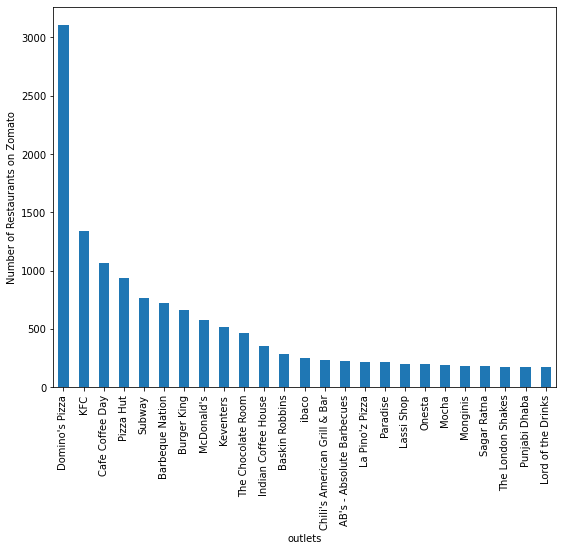

In [31]:
outlet= (df['name'].value_counts()).head(25)
outlet.plot(kind='bar', figsize=(9, 7))
plt.xlabel("outlets")
plt.ylabel("Number of Restaurants on Zomato")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


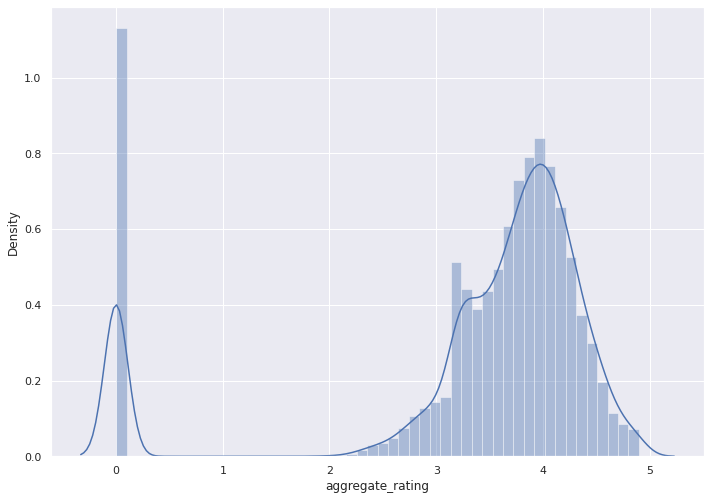

In [32]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df['aggregate_rating'])
plt.show()

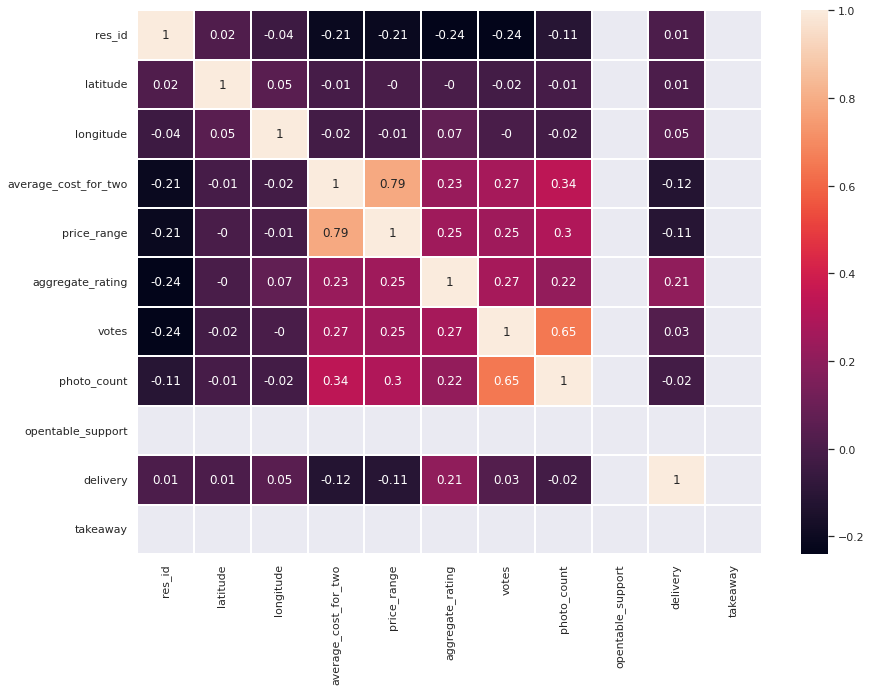

In [33]:
plt.figure(figsize=(14,10))
correlation_matrix = df.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True,linewidths=1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


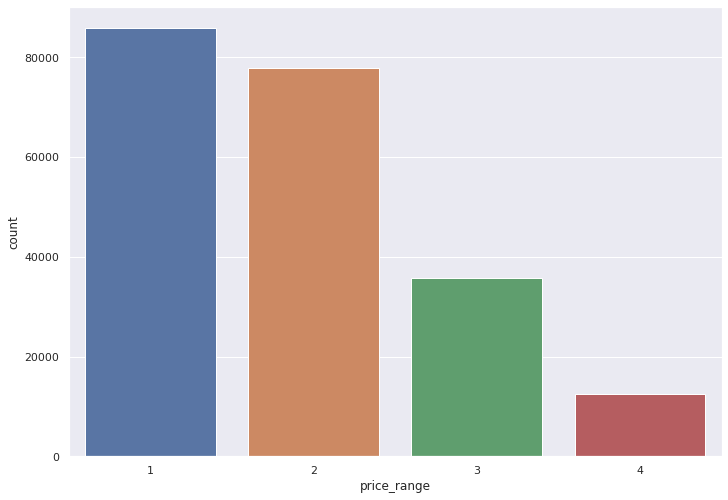

In [34]:
sns.countplot(df['price_range'])


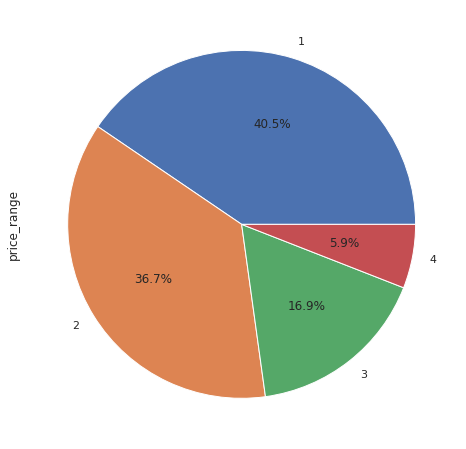

In [35]:
df.price_range.value_counts(normalize=True).plot(kind='pie', figsize=(10,8), autopct='%1.1f%%')

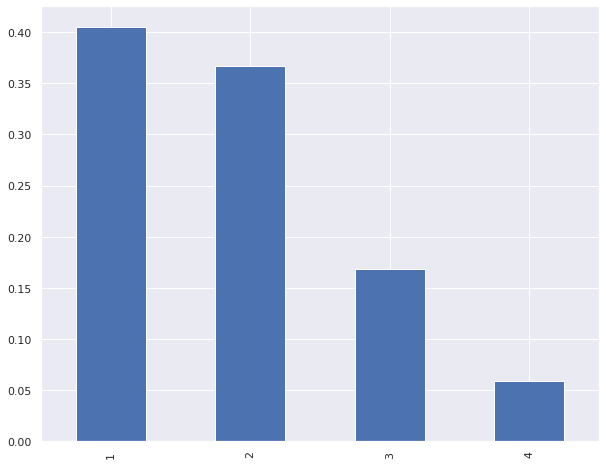

In [36]:
df.price_range.value_counts(normalize=True).plot(kind='bar', figsize=(10,8))